In [3]:
%pip install pytorch-tabular[all]


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   --------------------------------------- 815.2/815.2 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/891.4 kB ? eta -:--:--
   --------------------------------------- 891.4/891.4 kB 19.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.2 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144577 sha256=4f4fa7e1641c4a2c4acc9758a84ae531f78f018244cb38f68bff1a88f4f0cdd0
  Stored in directory: c:\users\vasistha\appdata\local\pip\cache\wheels\b1\a3\c2\6df046c09459b73cc9bb6c4401b0be6c47048baf9a1617c485
Successfully built antlr4-python3-runtime
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.


  Using cached pytorch_tabular-1.1.1-py2.py3-none-any.whl.metadata (24 kB)
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached torchmetrics-1.5.2-py3-none-any.whl.metadata (20 kB)
  Using cached pytorch_tabnet-4.1.0-py3-none-any.whl.metadata (15 kB)
  Using cached ipywidgets-8.1.6-py3-none-any.whl.metadata (2.4 kB)
  Using cached einops-0.7.0-py3-none-any.whl.metadata (13 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached lightning_utilities-0.11.9-py3-none-any.whl.metadata (5.2 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached jupyterlab_widgets-3.0.14-py3-none-any.whl.metadata (4.1 kB)
  Using cached aiohttp-3.10.11-cp38-cp38-win_amd64.whl.metadata (8.0 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached aiohappye

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.


In [18]:
import pandas as pd
from pytorch_tabular import TabularModel
from pytorch_tabular.models.tab_transformer.config import TabTransformerConfig
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig

# 1. Load your dataset
df = pd.read_csv("cleaned_merged_stock_topic_data_3.csv")

# 2. Preprocessing
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])
df["Direction"] = df["Direction"].map({"Up": 1, "Down": 0})  # Convert target to numeric

# 3. Define Configs
target_col = "Direction"
categorical_cols = ["Stock","Date"]  # Add other categorical columns if needed
continuous_cols = [col for col in df.columns if col not in ["Date", "Direction", "Stock","Unnamed: 0",'Daily_Return']]

data_config = DataConfig(
    target=["Direction"],  # <-- make this a list, not a string
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols,
    normalize_continuous_features=True
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=64,
    max_epochs=25,
    early_stopping="valid_loss",
    checkpoints="valid_loss",   
)

optimizer_config = OptimizerConfig()


model_config = TabTransformerConfig(
    task="classification",
    metrics=["accuracy"],
    learning_rate=1e-4,
    input_embed_dim=32,               # Size of categorical embeddings
    share_embedding=True,             # Use shared embeddings for categorical features
    share_embedding_strategy="fraction",  # Strategy to share embedding space
    shared_embedding_fraction=0.25,   # How much of embedding is shared
    num_heads=8,                      # Number of attention heads
    num_attn_blocks=6,                # Number of attention blocks (layers)
    attn_dropout=0.1,                 # Dropout after attention
    add_norm_dropout=0.1,             # Dropout in Add-Norm
    ff_dropout=0.1,                   # Dropout in FeedForward layers
    ff_hidden_multiplier=4,          # FFN size = 4x embedding size
    transformer_activation="GEGLU",   # Activation in transformer FFN
    seed=42
)


# 4. Initialize and Train Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabular_model.fit(train=df)

# 5. Evaluate
results = tabular_model.evaluate(df)
print(results)


2025-04-21 21:25:14,691 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-04-21 21:25:14,741 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-04-21 21:25:14,760 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

2025-04-21 21:25:14,857 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: TabTransformerModel

2025-04-21 21:25:14,986 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-04-21 21:25:15,042 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

c:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\vasistha\Human-Centered-DataScience\Project\saved_models exists and is not empty.
c:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 1.3182567385564074e-07
Restoring states from the checkpoint path at c:\Users\vasistha\Human-Centered-DataScience\Project\.lr_find_3f69a336-bb17-4b94-838b-3f1f1ba5f10b.ckpt
Restored all states from the checkpoint at c:\Users\vasistha\Human-Centered-DataScience\Project\.lr_find_3f69a336-bb17-4b94-838b-3f1f1ba5f10b.ckpt


2025-04-21 21:25:20,914 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 1.3182567385564074e-07. For   
plot and detailed analysis, use `find_learning_rate` method.

2025-04-21 21:25:20,933 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  271 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  4.9 K │ train │
│ 2 │ _head            │ LinearHead             │    240 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 276 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 276 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 123                                                                                         
Modules in eval mode: 0

Output()

2025-04-21 21:26:06,753 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-04-21 21:26:06,753 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

Output()

c:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\pytorch_tabular\utils\python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, ma

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.4789067208766937     │
│         test_loss         │    0.7823614478111267     │
│        test_loss_0        │    0.7823614478111267     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 0.7823614478111267, 'test_loss': 0.7823614478111267, 'test_accuracy': 0.4789067208766937}]


In [19]:
from pytorch_tabular.models.tab_transformer.config import TabTransformerConfig
help(TabTransformerConfig)

Help on class TabTransformerConfig in module pytorch_tabular.models.tab_transformer.config:

class TabTransformerConfig(pytorch_tabular.config.config.ModelConfig)
 |  TabTransformerConfig(task: str, head: Union[str, NoneType] = 'LinearHead', head_config: Union[Dict, NoneType] = <factory>, embedding_dims: Union[List, NoneType] = None, embedding_dropout: float = 0.0, batch_norm_continuous_input: bool = True, learning_rate: float = 0.001, loss: Union[str, NoneType] = None, metrics: Union[List[str], NoneType] = None, metrics_prob_input: Union[List[bool], NoneType] = None, metrics_params: Union[List, NoneType] = None, target_range: Union[List, NoneType] = None, virtual_batch_size: Union[int, NoneType] = None, seed: int = 42, _module_src: str = 'models.tab_transformer', _model_name: str = 'TabTransformerModel', _backbone_name: str = 'TabTransformerBackbone', _config_name: str = 'TabTransformerConfig', input_embed_dim: int = 32, embedding_initialization: Union[str, NoneType] = 'kaiming_unifor

In [6]:
%pip install captum


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
explanations = tabular_model.explain(df, method="IntegratedGradients")
print(explanations.head())



NotImplementedError: Attributions are not implemented for TabTransformerModel

In [20]:
tabular_model.save_model("my_finetuned_tabtransformer/")


2025-04-21 21:27:23,475 - {pytorch_tabular.tabular_model:171} - INFO - Experiment Tracking is turned off

2025-04-21 21:27:23,492 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Output()

c:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.45543670654296875    │
│         test_loss         │    0.7794811725616455     │
│        test_loss_0        │    0.7794811725616455     │
└───────────────────────────┴───────────────────────────┘

📊 Evaluation Results:
 [{'test_loss_0': 0.7794811725616455, 'test_loss': 0.7794811725616455, 'test_accuracy': 0.45543670654296875}]

Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.65      0.56       602
           1       0.36      0.23      0.28       520

    accuracy                           0.46      1122
   macro avg       0.43      0.44      0.42      1122
weighted avg       0.43      0.46      0.43      1122


Confusion Matrix:



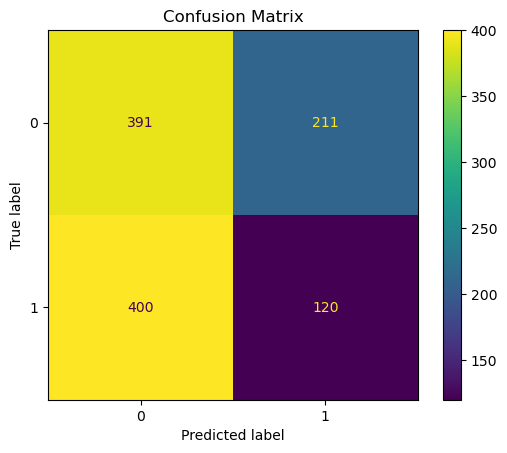

In [21]:
# 1. Imports
import pandas as pd
from pytorch_tabular import TabularModel
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# from pytorch_tabular.models import load_model
# 2. Load your test dataset
# Replace this with your actual test data path
test_df = pd.read_csv("TestDataset/final_merged_stock_topic_sentiment_test.csv")

# OPTIONAL: convert 'Direction' to numeric if it's still 'Up'/'Down'
# test_df["Direction"] = test_df["Direction"].map({"Down": 0, "Up": 1})

# 2. Drop unnecessary columns


# 3. If Direction is in string format ('Up'/'Down'), map it to numeric
if test_df["Direction"].dtype == object:
    test_df["Direction"] = test_df["Direction"].map({"Down": 0, "Up": 1})
    
drop_cols = ["Unnamed: 0.1"]
test_df = test_df.drop(columns=[col for col in drop_cols if col in test_df.columns])

# Get all feature columns used in training
all_required_columns = tabular_model.config.continuous_cols + tabular_model.config.categorical_cols

# Add missing columns with default value 0
for col in all_required_columns:
    if col not in test_df.columns:
        test_df[col] = 0  # Assume no signal for that topic/sentiment on that day

# Ensure correct column order
test_df = test_df[all_required_columns + tabular_model.config.target]


# 3. Load the trained model
model_path = "my_finetuned_tabtransformer"  # Folder where you saved it
tabular_model = TabularModel.load_model("my_finetuned_tabtransformer")


# 4. Evaluate the model (prints loss, accuracy, etc.)
results = tabular_model.evaluate(test_df)
print("📊 Evaluation Results:\n", results)

# 5. Predict the target values
preds = tabular_model.predict(test_df)

# 6. Attach predictions to test_df
# Attach predictions to test_df
test_df["Predicted"] = preds["Direction_prediction"]


# 7. Print Classification Report & Confusion Matrix
print("\nClassification Report:\n")
print(classification_report(test_df["Direction"], test_df["Predicted"]))

print("\nConfusion Matrix:\n")
ConfusionMatrixDisplay.from_predictions(test_df["Direction"], test_df["Predicted"])
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# # 8. (Optional) Save results
# test_df.to_csv("test_predictions_with_actuals.csv", index=False)


In [3]:
import pytorch_tabular
print(pytorch_tabular.__version__)


1.1.1


In [9]:
print("Expected categorical cols:", tabular_model.config.categorical_cols)
print("Expected continuous cols:", tabular_model.config.continuous_cols)


Expected categorical cols: ['Stock', 'Date']
Expected continuous cols: ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Volatility_10', 'Volatility_20', 'SMA_10', 'SMA_20', 'std_10', 'std_20', 'Upper_BB_10', 'Lower_BB_10', 'Upper_BB_20', 'Lower_BB_20', 'topic_-1_negative', 'topic_-1_neutral', 'topic_-1_positive', 'topic_0_negative', 'topic_0_neutral', 'topic_0_positive', 'topic_1_negative', 'topic_1_neutral', 'topic_1_positive', 'topic_2_negative', 'topic_2_neutral', 'topic_2_positive', 'topic_3_negative', 'topic_3_neutral', 'topic_3_positive', 'topic_4_negative', 'topic_4_neutral', 'topic_4_positive', 'topic_5_negative', 'topic_5_neutral', 'topic_5_positive', 'topic_6_negative', 'topic_6_neutral', 'topic_6_positive', 'topic_7_negative', 'topic_7_neutral', 'topic_7_positive', 'topic_8_negative', 'topic_8_neutral', 'topic_8_positive', 'topic_-1', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8']


In [11]:
print("Your test_df columns:", test_df.columns.tolist())


Your test_df columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Volatility_10', 'Volatility_20', 'SMA_10', 'SMA_20', 'std_10', 'std_20', 'Upper_BB_10', 'Lower_BB_10', 'Upper_BB_20', 'Lower_BB_20', 'Direction', 'Total Comments', 'Negative Comments', 'Positive Comments', 'Neutral Comments', 'Topic_-1', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Sentiment_Score', 'Sentiment_Intensity', 'Weighted_Sentiment', 'topic_-1_negative', 'topic_-1_neutral', 'topic_-1_positive', 'topic_0_negative', 'topic_0_neutral', 'topic_0_positive', 'topic_1_negative', 'topic_1_neutral', 'topic_1_positive', 'topic_2_negative', 'topic_2_neutral', 'topic_2_positive', 'topic_3_negative', 'topic_3_neutral', 'topic_3_positive', 'topic_4_negative', 'topic_4_neutral', 'topic_5_negative', 'topic_5_neutral', 'topic_5_positive', 'topic_6_negative', 'topic_6_neutral', 'topic_6_positive', 'topic_7_negative', 'topic_7_neutral', 'topic_7_positive', 'to

In [12]:
for col in tabular_model.config.categorical_cols:
    if col not in test_df.columns:
        test_df[col] = "missing"
        print('The column ',col,' is missing')# or a safe fallback category


The column  Stock  is missing
The column  Date  is missing


In [16]:
print(type(preds))
print(preds)


<class 'pandas.core.frame.DataFrame'>
      Direction_0_probability  Direction_1_probability  Direction_prediction
0                         1.0             3.900224e-38                     0
1                         1.0             2.361974e-21                     0
2                         1.0             0.000000e+00                     0
3                         1.0             0.000000e+00                     0
4                         1.0             0.000000e+00                     0
...                       ...                      ...                   ...
1117                      1.0             0.000000e+00                     0
1118                      1.0             0.000000e+00                     0
1119                      0.0             1.000000e+00                     1
1120                      1.0             0.000000e+00                     0
1121                      1.0             0.000000e+00                     0

[1122 rows x 3 columns]


In [22]:
tabular_model.explain(test_df, method="IntegratedGradients")


NotImplementedError: Attributions are not implemented for TabTransformerModel